# File formats and modern data analysis

Most of the exciting developments in seamless data analysis, particularly for large Earth Science datasets are happening in python. In recent years, robust and open ecosystems have been developed around tools like xarray and Pandas which make it very easy to load in large data sets, manipulate them in various ways and produce beautiful plots. This notebook will serve as a basic overview of netcdf (in Python) manipulation with xarray and the Pandas/Geopandas packages. Most of this notebook is based on [Project Pythia by Brian Rose](https://foundations.projectpythia.org/) and the [Earth and Environmental Data Science Course](https://earth-env-data-science.github.io/). If you'd like to learn more, the tutorials at the above link are highly recommended.

In [1]:
from datetime import timedelta

import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

## xarray

In [2]:
data = 283 + 5 * np.random.randn(5, 3, 4) #make a random numpy array

The primary data type in xarray is a "DataArray". It works just like a numpy array, but also:
1. Coordinate names and values are stored with the data, making slicing and indexing much more powerful.

2. Attributes, similar to those in netCDF files, can be stored in a container built into the DataArray.

In [5]:
temp = xr.DataArray(data, dims=['time', 'lat', 'lon']) #assigns names to the three dimensions
temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[275.83708793, 281.53649931, 281.45886333, 285.43323176],
        [280.62090433, 283.65269693, 280.13550926, 280.36079195],
        [286.49401254, 279.99681275, 277.16857884, 284.84403102]],

       [[280.20524491, 278.34912189, 284.40934167, 278.93788542],
        [279.87819988, 283.83518712, 276.08544448, 290.45355472],
        [283.15451427, 279.48575729, 292.76540456, 277.2050724 ]],

       [[285.22373901, 279.9799866 , 286.02402923, 282.55400762],
        [271.63694234, 290.8616347 , 280.79876199, 279.08414031],
        [287.45990363, 282.68897944, 288.69173183, 285.3024224 ]],

       [[282.63207217, 288.11654797, 276.2074063 , 277.63988573],
        [285.18376703, 282.59647497, 278.75511466, 287.78487782],
        [283.09451057, 296.00575765, 289.76116866, 283.60717266]],

       [[280.22830964, 289.27081212, 276.04830654, 284.51731077],
        [281.19862681, 281.82074996, 279.46346537, 281.90806179],
        [278.92323274, 285.45091342, 280.7112069 , 281.41986355]]])
Dimensions without coordinates: time, lat, lon

Most modern datasets that include temporal information (time and date when an observation was made) use a format for time called "datetime" ([see Project Pythia for detail](https://foundations.projectpythia.org/core/datetime/datetime.html)). What you should know is that datetime format has information as: YYYY-MM-DD HH:MM:SS. This can also be shortened if further precision (i.e. time or minutes) is not available, or can include arbitrarily high precision (decimal seconds). Converting from other time format to datetime can make many different ways of processing data much easier (especially when using Pandas, see later).

In [6]:
times = pd.date_range('2018-01-01', periods=5)
times

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

In [7]:
lons = np.linspace(-120, -60, 4)
lats = np.linspace(25, 55, 3)

In [8]:
temp = xr.DataArray(data, coords=[times, lats, lons], dims=['time', 'lat', 'lon'])
temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[275.83708793, 281.53649931, 281.45886333, 285.43323176],
        [280.62090433, 283.65269693, 280.13550926, 280.36079195],
        [286.49401254, 279.99681275, 277.16857884, 284.84403102]],

       [[280.20524491, 278.34912189, 284.40934167, 278.93788542],
        [279.87819988, 283.83518712, 276.08544448, 290.45355472],
        [283.15451427, 279.48575729, 292.76540456, 277.2050724 ]],

       [[285.22373901, 279.9799866 , 286.02402923, 282.55400762],
        [271.63694234, 290.8616347 , 280.79876199, 279.08414031],
        [287.45990363, 282.68897944, 288.69173183, 285.3024224 ]],

       [[282.63207217, 288.11654797, 276.2074063 , 277.63988573],
        [285.18376703, 282.59647497, 278.75511466, 287.78487782],
        [283.09451057, 296.00575765, 289.76116866, 283.60717266]],

       [[280.22830964, 289.27081212, 276.04830654, 284.51731077],
        [281.19862681, 281.82074996, 279.46346537, 281.90806179],
        [278.92323274, 285.45091342, 280.7112069 , 281.41986355]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0

Just like we saw with netcdf files, attributes are useful information about variables (like units and names). We can add attributes to the DataArray to convey important metadata about the variables.

In [9]:
temp.attrs['units'] = 'kelvin'
temp.attrs['standard_name'] = 'air_temperature'

When an operation is performed on a DataArray it loses its attributes in case they have changed (but it stay attached to the original data)

In [10]:
temp_in_celsius = temp - 273.15
temp_in_celsius

<xarray.DataArray (time: 5, lat: 3, lon: 4)>
array([[[ 2.68708793,  8.38649931,  8.30886333, 12.28323176],
        [ 7.47090433, 10.50269693,  6.98550926,  7.21079195],
        [13.34401254,  6.84681275,  4.01857884, 11.69403102]],

       [[ 7.05524491,  5.19912189, 11.25934167,  5.78788542],
        [ 6.72819988, 10.68518712,  2.93544448, 17.30355472],
        [10.00451427,  6.33575729, 19.61540456,  4.0550724 ]],

       [[12.07373901,  6.8299866 , 12.87402923,  9.40400762],
        [-1.51305766, 17.7116347 ,  7.64876199,  5.93414031],
        [14.30990363,  9.53897944, 15.54173183, 12.1524224 ]],

       [[ 9.48207217, 14.96654797,  3.0574063 ,  4.48988573],
        [12.03376703,  9.44647497,  5.60511466, 14.63487782],
        [ 9.94451057, 22.85575765, 16.61116866, 10.45717266]],

       [[ 7.07830964, 16.12081212,  2.89830654, 11.36731077],
        [ 8.04862681,  8.67074996,  6.31346537,  8.75806179],
        [ 5.77323274, 12.30091342,  7.5612069 ,  8.26986355]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0

A DataSet is an object type in xarray that can hold many different variables (sort of like a netCDF file, but within python's working memory). xarray can figure out automatically if the variables in a dataset share the same dimensions. Here we make one.

In [11]:
pressure_data = 1000.0 + 5 * np.random.randn(5, 3, 4)
pressure = xr.DataArray(
    pressure_data, coords=[times, lats, lons], dims=['time', 'lat', 'lon']
)
pressure.attrs['units'] = 'hPa'
pressure.attrs['standard_name'] = 'air_pressure'

ds = xr.Dataset(data_vars={'Temperature': temp, 'Pressure': pressure})
ds
#ds.Pressure #to select a variable

<xarray.Dataset>
Dimensions:      (time: 5, lat: 3, lon: 4)
Coordinates:
  * time         (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
  * lat          (lat) float64 25.0 40.0 55.0
  * lon          (lon) float64 -120.0 -100.0 -80.0 -60.0
Data variables:
    Temperature  (time, lat, lon) float64 275.8 281.5 281.5 ... 280.7 281.4
    Pressure     (time, lat, lon) float64 1.001e+03 997.8 ... 1.008e+03 997.5

We can index and select data as in a numpy array using [], but also in other clever ways based on the dimensions.

In [12]:
named_selection = ds.Temperature.sel(time='2018-01-02')
named_selection

<xarray.DataArray 'Temperature' (lat: 3, lon: 4)>
array([[280.20524491, 278.34912189, 284.40934167, 278.93788542],
       [279.87819988, 283.83518712, 276.08544448, 290.45355472],
       [283.15451427, 279.48575729, 292.76540456, 277.2050724 ]])
Coordinates:
    time     datetime64[ns] 2018-01-02
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

In this example, we are trying to sample a temporal data point within 2 days of the date 2018-01-07. Since the final date on our DataArray’s temporal axis is 2018-01-05, we can use .sel() to perform nearest-neighbor sampling, by setting the method keyword argument to ‘nearest’.

In [13]:
temp.sel(time='2018-01-07', method='nearest', tolerance=timedelta(days=2))

<xarray.DataArray (lat: 3, lon: 4)>
array([[280.22830964, 289.27081212, 276.04830654, 284.51731077],
       [281.19862681, 281.82074996, 279.46346537, 281.90806179],
       [278.92323274, 285.45091342, 280.7112069 , 281.41986355]])
Coordinates:
    time     datetime64[ns] 2018-01-05
  * lat      (lat) float64 25.0 40.0 55.0
  * lon      (lon) float64 -120.0 -100.0 -80.0 -60.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

In this example, we are trying to extract a timeseries at 40°N latitude and 105°W longitude. Our DataArray does not contain a longitude data value of -105, so in order to retrieve this timeseries, we must interpolate between data points. .interp() allows us to retrieve data from any latitude and longitude by means of interpolation. This method uses coordinate-value selection, similarly to .sel().

In [14]:
temp.interp(lon=-105, lat=40)

<xarray.DataArray (time: 5)>
array([282.89474878, 282.84594031, 286.05546161, 283.24329799,
       281.66521918])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-05
    lon      int64 -105
    lat      int64 40
Attributes:
    units:          kelvin
    standard_name:  air_temperature

A slice is a range of data along one or more coordinates. To slice data, you create a slice object and then use it to index a dataset.

In [15]:
temp.sel(time=slice('2018-01-01', '2018-01-03'), lon=slice(-110, -70), lat=slice(25, 45))

<xarray.DataArray (time: 3, lat: 2, lon: 2)>
array([[[281.53649931, 281.45886333],
        [283.65269693, 280.13550926]],

       [[278.34912189, 284.40934167],
        [283.83518712, 276.08544448]],

       [[279.9799866 , 286.02402923],
        [290.8616347 , 280.79876199]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 2018-01-03
  * lat      (lat) float64 25.0 40.0
  * lon      (lon) float64 -100.0 -80.0
Attributes:
    units:          kelvin
    standard_name:  air_temperature

## Loading netCDF in Python with xarray

Xarray can easily open netCDF datasets, provided they conform to certain limitations (for example, 1-dimensional coordinates)

In [16]:
ds = xr.open_dataset('ERA5_2mtemp_SLP_2022.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 6)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2022-06-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-16 15:10:53 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

We can select slices based on coordinates as before, and xarray will select in for all DataArrays within the DataSet

In [17]:
ds_feb = ds.sel(time='2022-02-01')
ds_feb

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 2022-02-01
Data variables:
    t2m        (latitude, longitude) float32 ...
    sp         (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-16 15:10:53 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

You can use named dimensions in an Xarray Dataset to manually slice and index data. However, these dimension names also serve an additional purpose: you can use them to specify dimensions to aggregate on. There are many different aggregation operations available; in this example, we focus on std (standard deviation). Here I am first selecting one variable (temperature) and then taking the mean over time, giving back a 2D DataArray with the mean at each lat/lon coordinate

In [18]:
t2m = ds['t2m']
t2m.mean(dim=['time'])

<xarray.DataArray 't2m' (latitude: 721, longitude: 1440)>
array([[256.01334, 256.01334, 256.01334, ..., 256.01334, 256.01334,
        256.01334],
       [256.00876, 256.00906, 256.00876, ..., 256.00876, 256.00876,
        256.00906],
       [256.06802, 256.06827, 256.06854, ..., 256.06775, 256.06802,
        256.06827],
       ...,
       [228.11365, 228.11528, 228.11772, ..., 228.10957, 228.11177,
        228.11339],
       [228.01544, 228.0168 , 228.01843, ..., 228.0125 , 228.01355,
        228.0141 ],
       [227.6132 , 227.6132 , 227.6132 , ..., 227.6132 , 227.6132 ,
        227.6132 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

Xarray greatly simplifies plotting of data stored as DataArrays and Datasets. One advantage of this is that many common plot elements, such as axis labels, are automatically generated and optimized for the data being plotted. Xarray includes a built-in plotting interface, which makes use of Matplotlib behind the scenes. In order to use this interface, you can call the .plot() method, which is included in every DataArray.

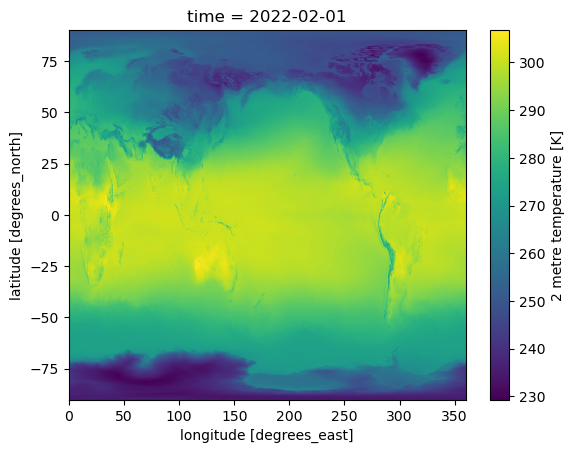

In [19]:
ds.t2m.sel(time='2022-02-01').plot()

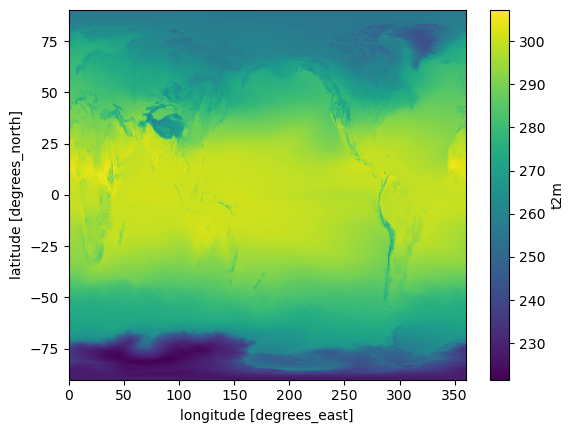

In [20]:
t2m.mean(dim=['time']).plot()

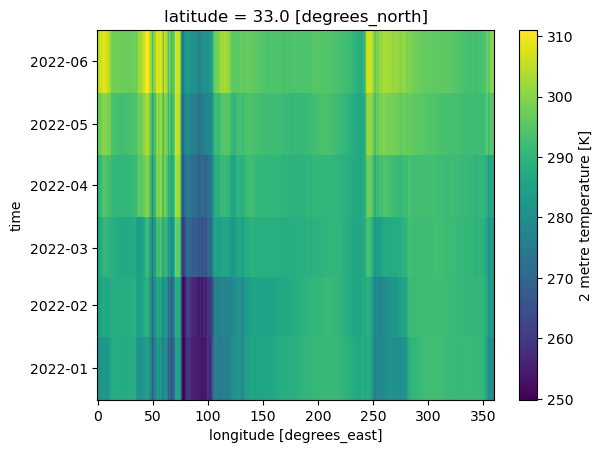

In [21]:
ds.t2m.sel(latitude=33.0).plot()

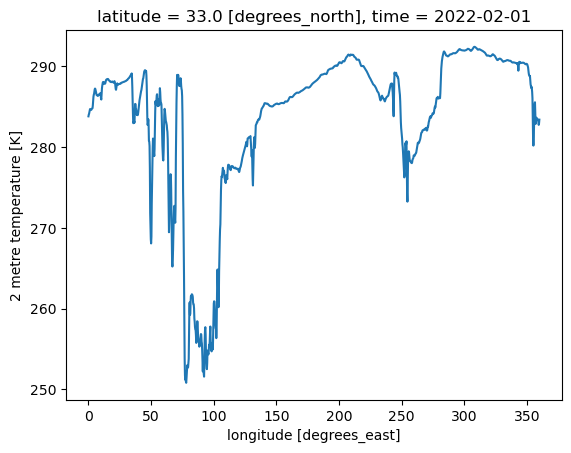

In [22]:
ds.t2m.sel(latitude=33.0,time='2022-02-01').plot()

## Pandas

Pandas is a very powerful library for working with tabular data (e.g., spreadsheets, comma-separated-value files, or database printouts; all of these are quite common for geoscientific data). It allows us to use labels for our data; this, in turn, allows us to write expressive and robust code to manipulate the data.

Key features of Pandas are the abilities to read in tabular data and to slice and dice data, as well as exploratory analysis tools native to the library.

A Series represents a one-dimensional array of data. The main difference between a Series and numpy array is that a Series has an index. The index contains the labels that we use to access the data.

In [23]:
names = ['Mercury', 'Venus', 'Earth']
values = [0.3e24, 4.87e24, 5.97e24]
masses = pd.Series(values, index=names)
masses

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

Like in xarray, series have built-in plotting methods

<Axes: >

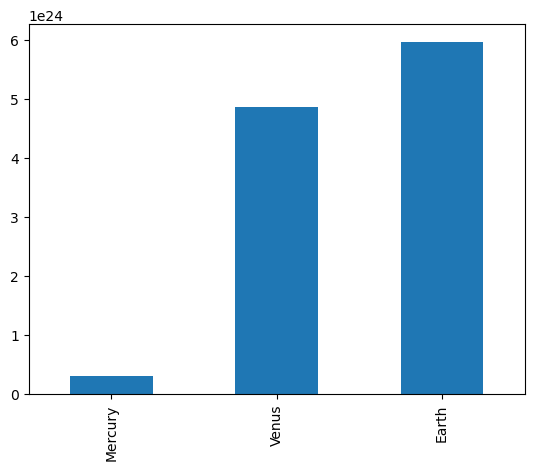

In [24]:
masses.plot(kind='bar')

Arithmetic operations and most numpy function can be applied to Series. An important point is that the Series keep their index during such operations.

In [25]:
np.log(masses) / masses**2

Mercury    6.006452e-46
Venus      2.396820e-48
Earth      1.600655e-48
dtype: float64

We can index the series using strings, which is very handy

In [26]:
masses.loc['Earth']

5.97e+24

In [27]:
masses.loc[['Venus', 'Earth']]

Venus    4.870000e+24
Earth    5.970000e+24
dtype: float64

In [ ]:
masses.loc['Mercury':'Earth'] #slicing

There is a lot more to Series, but they are limit to a single “column”. A more useful Pandas data structure is the DataFrame. A DataFrame is basically a bunch of series that share the same index. It’s a lot like a table in a spreadsheet.

In [28]:
# first we create a dictionary
data = {'mass': [0.3e24, 4.87e24, 5.97e24],       # kg
        'diameter': [4879e3, 12_104e3, 12_756e3], # m
        'rotation_period': [1407.6, np.nan, 23.9] # h
       }
df = pd.DataFrame(data, index=['Mercury', 'Venus', 'Earth'])
df

,mass,diameter,rotation_period
Mercury,3.000000e+23,4879000.0,1407.6
Venus,4.870000e+24,12104000.0,NaN
Earth,5.970000e+24,12756000.0,23.9


We can do many different arithmetic or statistical operations on a DataFrame

In [29]:
df.min()

mass               3.000000e+23
diameter           4.879000e+06
rotation_period    2.390000e+01
dtype: float64

In [30]:
df.mean()

mass               3.713333e+24
diameter           9.913000e+06
rotation_period    7.157500e+02
dtype: float64

In [31]:
df.describe()

,mass,diameter,rotation_period
count,3.000000e+00,3.000000e+00,2.000000
mean,3.713333e+24,9.913000e+06,715.750000
std,3.006765e+24,4.371744e+06,978.423653
min,3.000000e+23,4.879000e+06,23.900000
25%,2.585000e+24,8.491500e+06,369.825000
50%,4.870000e+24,1.210400e+07,715.750000
75%,5.420000e+24,1.243000e+07,1061.675000
max,5.970000e+24,1.275600e+07,1407.600000


Indexing is made very easy with dataframes

In [32]:
df['mass']

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
Name: mass, dtype: float64

In [33]:
df.loc['Earth']

mass               5.970000e+24
diameter           1.275600e+07
rotation_period    2.390000e+01
Name: Earth, dtype: float64

In [34]:
df.loc['Earth', 'mass']

5.97e+24

Adding new columns is as easy as referencing an undefined column

In [35]:
df['density'] = df.mass / (4/3 * np.pi * (df.diameter/2)**3)
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


New series or dataframes can be added to existing dataframes

In [36]:
temperature = pd.Series([167, 464, 15, -65],
                     index=['Mercury', 'Venus', 'Earth', 'Mars'],
                     name='temperature')
df.join(temperature, how='right')

,mass,diameter,rotation_period,density,temperature
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,167
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15
Mars,NaN,NaN,NaN,NaN,-65


In [38]:
everyone = df.reindex(['Mercury', 'Venus', 'Earth', 'Mars'])
everyone

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577
Mars,NaN,NaN,NaN,NaN


Indexing with a boolean is easy

In [39]:
bigguys = df[df.mass > 4e24]
bigguys

,mass,diameter,rotation_period,density
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


As in xarray, plotting functions from matplotlib are build directly into Pandas

<Axes: xlabel='mass', ylabel='diameter'>

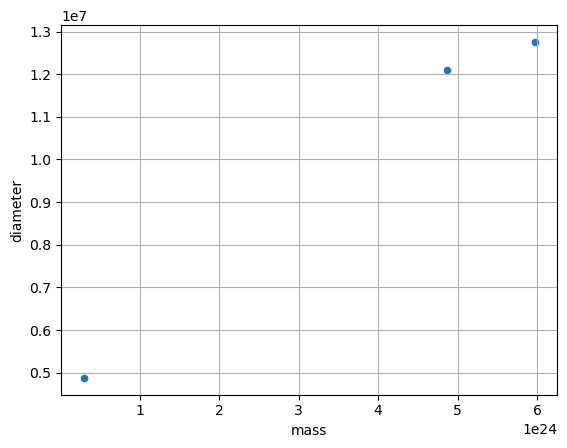

In [40]:
df.plot(kind='scatter', x='mass', y='diameter', grid=True)

<Axes: >

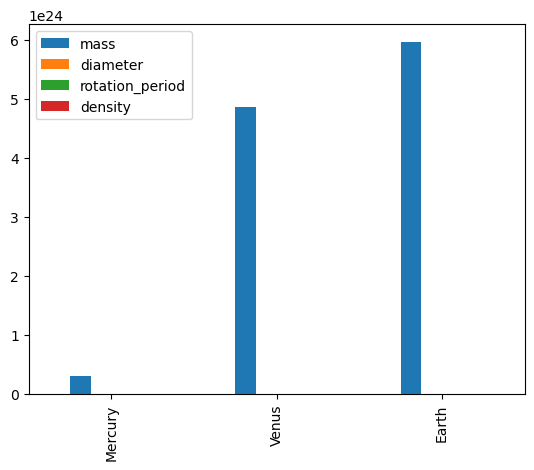

In [41]:
df.plot(kind='bar')

Also like xarray, we can use datetime to index data. Plotting with datetime is very nice

<Axes: >

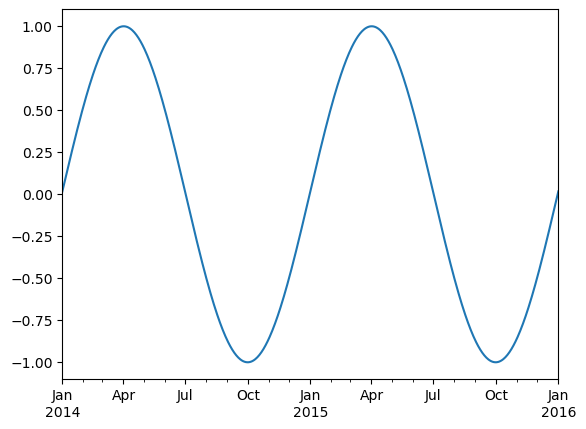

In [42]:
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')
timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       index=two_years)
timeseries.plot()

<Axes: >

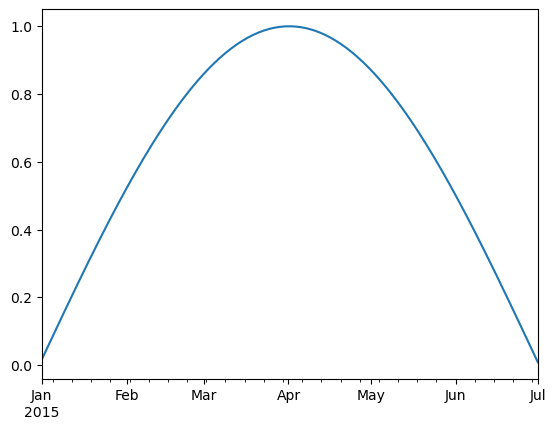

In [43]:
timeseries.loc['2015-01-01':'2015-07-01'].plot() #slicing

Loading uncompressed data directly into a dataframe makes manipulating the data much easier. Here we need to know that the file is space-delimited, not comma delimited which is the default assumption of the read_csv function.

In [44]:
df = pd.read_csv('station_data.txt', sep='\s+')
df

,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,64756,20170101,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,...,-99.000,-99.000,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
1,64756,20170102,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,...,-99.000,-99.000,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2,64756,20170103,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,...,-99.000,-99.000,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
3,64756,20170104,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,...,-99.000,-99.000,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
4,64756,20170105,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,...,-99.000,-99.000,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,64756,20171227,2.622,-73.74,41.79,-6.7,-19.3,-13.0,-12.9,0.0,...,0.258,0.238,0.215,0.166,0.170,0.8,1.0,1.7,3.1,4.6
361,64756,20171228,2.622,-73.74,41.79,-10.3,-21.5,-15.9,-15.8,0.0,...,0.235,0.244,0.211,0.165,0.168,0.4,0.6,1.4,2.8,4.5
362,64756,20171229,2.622,-73.74,41.79,-9.4,-19.0,-14.2,-14.7,0.0,...,-99.000,-99.000,0.207,0.163,0.167,0.1,0.4,1.1,2.6,4.3
363,64756,20171230,2.622,-73.74,41.79,-7.1,-18.9,-13.0,-13.6,1.1,...,-99.000,-99.000,0.203,0.161,0.166,0.0,0.2,0.9,2.4,4.1


In [45]:
df = pd.read_csv('station_data.txt', sep='\s+', na_values=[-9999.0, -99.0]) #we tell it what missing values look like

In [46]:
df.info() #dump info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   WBANNO                   365 non-null    int64  
 1   LST_DATE                 365 non-null    int64  
 2   CRX_VN                   365 non-null    float64
 3   LONGITUDE                365 non-null    float64
 4   LATITUDE                 365 non-null    float64
 5   T_DAILY_MAX              364 non-null    float64
 6   T_DAILY_MIN              364 non-null    float64
 7   T_DAILY_MEAN             364 non-null    float64
 8   T_DAILY_AVG              364 non-null    float64
 9   P_DAILY_CALC             364 non-null    float64
 10  SOLARAD_DAILY            364 non-null    float64
 11  SUR_TEMP_DAILY_TYPE      365 non-null    object 
 12  SUR_TEMP_DAILY_MAX       364 non-null    float64
 13  SUR_TEMP_DAILY_MIN       364 non-null    float64
 14  SUR_TEMP_DAILY_AVG       3

In [47]:
df = pd.read_csv('station_data.txt', sep='\s+',na_values=[-9999.0, -99.0],parse_dates=[1]) #make sure it knows which column is datatime formated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   WBANNO                   365 non-null    int64         
 1   LST_DATE                 365 non-null    datetime64[ns]
 2   CRX_VN                   365 non-null    float64       
 3   LONGITUDE                365 non-null    float64       
 4   LATITUDE                 365 non-null    float64       
 5   T_DAILY_MAX              364 non-null    float64       
 6   T_DAILY_MIN              364 non-null    float64       
 7   T_DAILY_MEAN             364 non-null    float64       
 8   T_DAILY_AVG              364 non-null    float64       
 9   P_DAILY_CALC             364 non-null    float64       
 10  SOLARAD_DAILY            364 non-null    float64       
 11  SUR_TEMP_DAILY_TYPE      365 non-null    object        
 12  SUR_TEMP_DAILY_MAX       364 non-nul

In [48]:
df = df.set_index('LST_DATE') #how to index (see on left)
df

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,64756,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,8.68,...,NaN,NaN,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
2017-01-02,64756,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,2.08,...,NaN,NaN,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2017-01-03,64756,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,0.68,...,NaN,NaN,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
2017-01-04,64756,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,2.85,...,NaN,NaN,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
2017-01-05,64756,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,4.90,...,NaN,NaN,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,64756,2.622,-73.74,41.79,-6.7,-19.3,-13.0,-12.9,0.0,8.36,...,0.258,0.238,0.215,0.166,0.170,0.8,1.0,1.7,3.1,4.6
2017-12-28,64756,2.622,-73.74,41.79,-10.3,-21.5,-15.9,-15.8,0.0,8.46,...,0.235,0.244,0.211,0.165,0.168,0.4,0.6,1.4,2.8,4.5
2017-12-29,64756,2.622,-73.74,41.79,-9.4,-19.0,-14.2,-14.7,0.0,7.09,...,NaN,NaN,0.207,0.163,0.167,0.1,0.4,1.1,2.6,4.3


In [49]:
df.loc['2017-08-07']

WBANNO                     64756
CRX_VN                     2.422
LONGITUDE                 -73.74
LATITUDE                   41.79
T_DAILY_MAX                 19.3
T_DAILY_MIN                 12.3
T_DAILY_MEAN                15.8
T_DAILY_AVG                 16.3
P_DAILY_CALC                 4.9
SOLARAD_DAILY               3.93
SUR_TEMP_DAILY_TYPE            C
SUR_TEMP_DAILY_MAX          22.3
SUR_TEMP_DAILY_MIN          11.9
SUR_TEMP_DAILY_AVG          17.7
RH_DAILY_MAX                94.7
RH_DAILY_MIN                76.4
RH_DAILY_AVG                89.5
SOIL_MOISTURE_5_DAILY      0.148
SOIL_MOISTURE_10_DAILY     0.113
SOIL_MOISTURE_20_DAILY     0.094
SOIL_MOISTURE_50_DAILY     0.114
SOIL_MOISTURE_100_DAILY    0.151
SOIL_TEMP_5_DAILY           21.4
SOIL_TEMP_10_DAILY          21.7
SOIL_TEMP_20_DAILY          22.1
SOIL_TEMP_50_DAILY          22.2
SOIL_TEMP_100_DAILY         21.5
Name: 2017-08-07 00:00:00, dtype: object

In [50]:
df.loc['2017-07-01':'2017-07-31'] #slicing

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-07-01,64756,2.422,-73.74,41.79,28.0,19.7,23.9,23.8,0.2,19.28,...,0.157,0.136,0.144,0.129,0.163,25.7,25.4,23.7,21.9,19.9
2017-07-02,64756,2.422,-73.74,41.79,29.8,18.4,24.1,23.7,4.0,27.67,...,0.146,0.135,0.143,0.129,0.162,26.8,26.4,24.5,22.3,20.1
2017-07-03,64756,2.422,-73.74,41.79,28.3,15.0,21.7,21.4,0.0,27.08,...,0.141,0.132,0.139,0.128,0.162,26.4,26.3,24.8,22.8,20.3
2017-07-04,64756,2.422,-73.74,41.79,26.8,12.6,19.7,20.0,0.0,29.45,...,0.131,0.126,0.136,0.126,0.161,25.9,25.8,24.6,22.9,20.6
2017-07-05,64756,2.422,-73.74,41.79,28.0,11.9,20.0,20.7,0.0,26.90,...,0.116,0.114,0.131,0.125,0.161,25.3,25.3,24.2,22.8,20.7
2017-07-06,64756,2.422,-73.74,41.79,25.7,14.3,20.0,20.3,0.0,19.03,...,0.105,0.104,0.126,0.124,0.160,24.7,24.7,23.9,22.7,20.9
2017-07-07,64756,2.422,-73.74,41.79,25.8,16.8,21.3,20.0,11.5,13.88,...,0.114,0.100,0.123,0.123,0.160,24.2,24.2,23.4,22.4,20.8
2017-07-08,64756,2.422,-73.74,41.79,29.0,15.3,22.1,21.5,0.0,21.92,...,0.130,0.106,0.122,0.123,0.159,25.5,25.3,23.9,22.4,20.8
2017-07-09,64756,2.422,-73.74,41.79,26.3,10.9,18.6,19.4,0.0,29.72,...,0.119,0.103,0.119,0.121,0.158,24.8,24.8,23.8,22.5,20.8


In [51]:
df.describe()

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
count,365.0,365.000000,3.650000e+02,3.650000e+02,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,317.000000,317.000000,336.000000,364.000000,359.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,64756.0,2.470767,-7.374000e+01,4.179000e+01,15.720055,4.037912,9.876374,9.990110,2.797802,13.068187,...,0.189498,0.183991,0.165470,0.140192,0.160630,12.312637,12.320604,12.060165,11.978022,11.915659
std,0.0,0.085997,5.265234e-13,3.842198e-13,10.502087,9.460676,9.727451,9.619168,7.238628,7.953074,...,0.052031,0.054113,0.043989,0.020495,0.016011,9.390034,9.338176,8.767752,8.078346,7.187317
min,64756.0,2.422000,-7.374000e+01,4.179000e+01,-12.300000,-21.800000,-17.000000,-16.700000,0.000000,0.100000,...,0.075000,0.078000,0.087000,0.101000,0.117000,-0.700000,-0.400000,0.200000,0.900000,1.900000
25%,64756.0,2.422000,-7.374000e+01,4.179000e+01,6.900000,-2.775000,2.100000,2.275000,0.000000,6.225000,...,0.152000,0.139000,0.118750,0.118000,0.154000,2.225000,2.000000,2.475000,3.300000,4.100000
50%,64756.0,2.422000,-7.374000e+01,4.179000e+01,17.450000,4.350000,10.850000,11.050000,0.000000,12.865000,...,0.192000,0.198000,0.183000,0.147500,0.165000,13.300000,13.350000,13.100000,12.850000,11.600000
75%,64756.0,2.422000,-7.374000e+01,4.179000e+01,24.850000,11.900000,18.150000,18.450000,1.400000,19.740000,...,0.234000,0.227000,0.203000,0.157000,0.173000,21.025000,21.125000,20.400000,19.800000,19.325000
max,64756.0,2.622000,-7.374000e+01,4.179000e+01,33.400000,20.700000,25.700000,26.700000,65.700000,29.910000,...,0.296000,0.321000,0.235000,0.182000,0.192000,27.600000,27.400000,25.600000,24.100000,22.100000


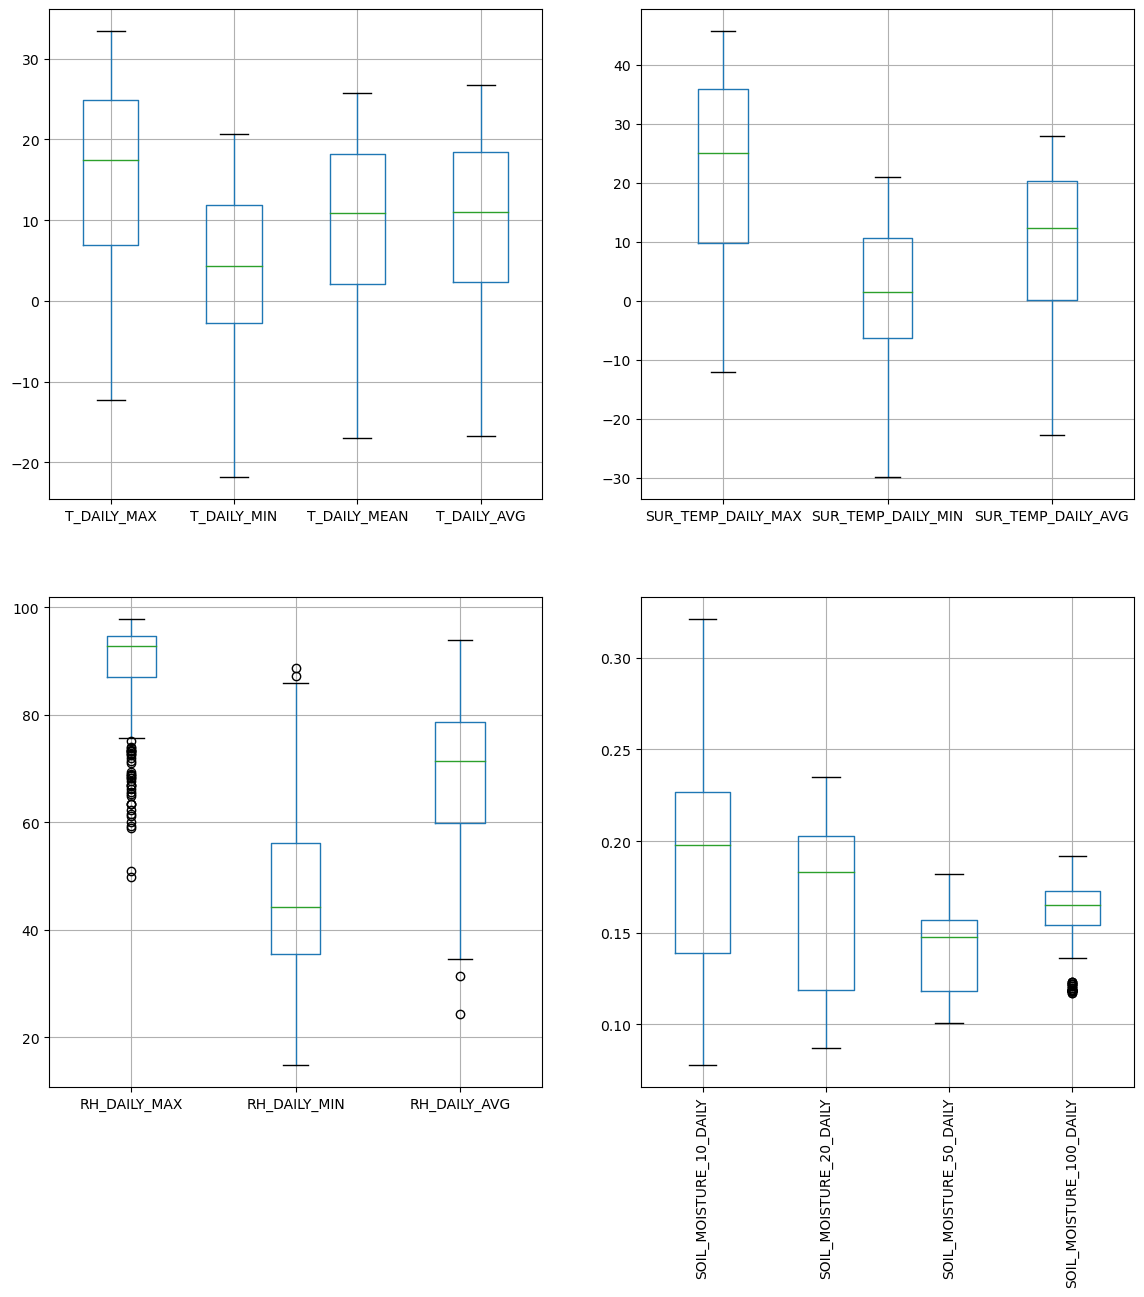

In [52]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(14,14))

df.iloc[:, 4:8].boxplot(ax=ax[0,0])
df.iloc[:, 10:14].boxplot(ax=ax[0,1])
df.iloc[:, 14:17].boxplot(ax=ax[1,0])
df.iloc[:, 18:22].boxplot(ax=ax[1,1])


ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90);

<Axes: xlabel='LST_DATE'>

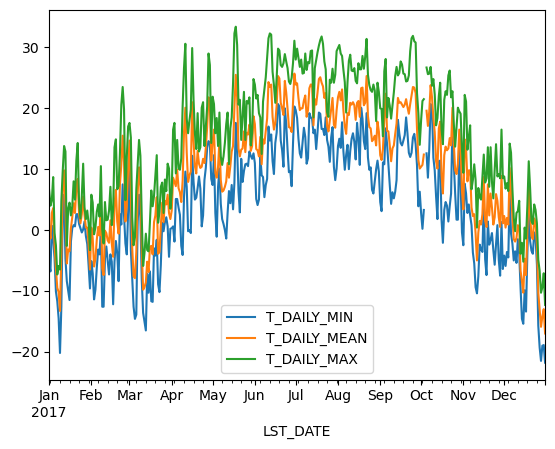

In [53]:
df[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

Pandas can quickly resample data

/var/folders/98/bv9gl3vn43936p1jw639gxbc00xmln/T/ipykernel_83983/2105326776.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mm = df.resample('MS').mean() #resample monthly and take a mean


<Axes: xlabel='LST_DATE'>

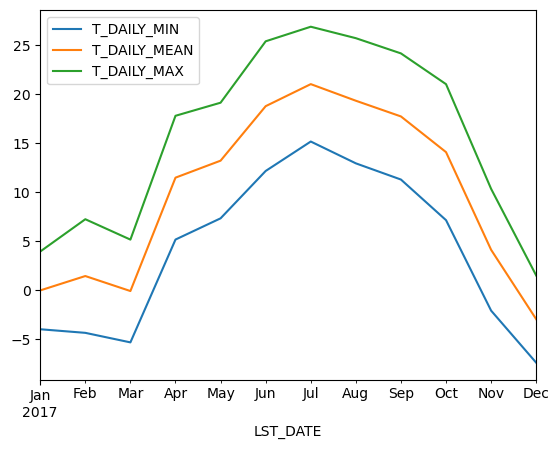

In [54]:
df_mm = df.resample('MS').mean() #resample monthly and take a mean
df_mm[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

One of the most powerful functions of Pandas is groupby, which allows you to do operations on data grouped by different attributes. It takes practice to get "good" at groupby, but worth it. First lets pull in some large earthquake catalogue data

In [56]:
df = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv', parse_dates=['time'], index_col='id')
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ak11453391,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
ak11453395,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
nc72358451,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake


In [59]:
df['country'] = df.place.str.split(', ').str[-1]
df_small = df[df.mag<4]
df = df[df.mag>4]
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,South of the Fiji Islands
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usc000t6yh,2014-12-01 02:56:07.950,21.2031,143.5484,11.05,4.4,mb,NaN,107.0,5.996,0.87,us,2015-02-24T00:35:14.040Z,"158km WNW of Farallon de Pajaros, Northern Mar...",earthquake,Northern Mariana Islands
usc000t6y2,2014-12-01 01:50:23.380,-7.8798,106.4275,52.10,4.3,mb,NaN,119.0,1.412,1.50,us,2015-02-24T00:35:14.040Z,"57km SSW of Cibungur, Indonesia",earthquake,Indonesia
usc000t6y1,2014-12-01 01:04:17.890,7.1429,126.8844,176.67,4.3,mb,NaN,134.0,1.297,0.87,us,2015-02-24T00:35:14.040Z,"37km ESE of Santiago, Philippines",earthquake,Philippines


The workflow with groupby can be divided into three general steps:

1. Split: Partition the data into different groups based on some criterion.

2. Apply: Do some caclulation within each group. Different types of “apply” steps might be

    (a) Aggregation: Get the mean or max within the group.

    (b) Transformation: Normalize all the values within a group

    (c) Filtration: Eliminate some groups based on a criterion.

3. Combine: Put the results back together into a single object.

Here we split by country name

In [62]:
gb = df.groupby('country') 
list(gb.groups.keys())

['',
 'Afghanistan',
 'Alaska',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Argentina',
 'Arizona',
 'Aruba',
 'Ascension Island region',
 'Australia',
 'Azerbaijan',
 'Azores Islands region',
 'Azores-Cape St. Vincent Ridge',
 'Balleny Islands region',
 'Banda Sea',
 'Bangladesh',
 'Barbados',
 'Barbuda',
 'Bay of Bengal',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Bouvet Island',
 'Bouvet Island region',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Burma',
 'Burundi',
 'California',
 'Canada',
 'Cape Verde',
 'Carlsberg Ridge',
 'Cayman Islands',
 'Celebes Sea',
 'Central East Pacific Rise',
 'Central Mid-Atlantic Ridge',
 'Chagos Archipelago region',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Crozet Islands region',
 'Cuba',
 'Cyprus',
 'Davis Strait',
 'Democratic Republic of the Congo',
 'Djibouti',
 'Dominica',
 'Dominican Republic',


Then we aggregate - in this case we take the magnitude and find the the ten countries with the largest Earthquakes (by MM). Doing groupby first ensures that we don't just get the ten largest earthquakes. We groupby, find the max for each group, then find the then largest.

In [63]:
gb.mag.max().nlargest(10)

country
Chile                         8.2
Alaska                        7.9
Solomon Islands               7.6
Papua New Guinea              7.5
El Salvador                   7.3
Mexico                        7.2
Fiji                          7.1
Indonesia                     7.1
Southern East Pacific Rise    7.0
                              6.9
Name: mag, dtype: float64

Multiple functions can also be done at once

In [64]:
gb.mag.aggregate([np.min, np.max, np.mean])

,amin,amax,mean
country,,,
,4.1,6.9,4.582544
Afghanistan,4.1,5.6,4.410656
Alaska,4.1,7.9,4.515025
Albania,4.1,5.0,4.391667
Algeria,4.1,5.5,4.583333
...,...,...,...
Zambia,4.1,5.3,4.457143
north of Ascension Island,4.4,4.4,4.400000
northern Mid-Atlantic Ridge,4.7,4.7,4.700000


This can be combined with a plotting function all in a single line of code

<Axes: xlabel='country'>

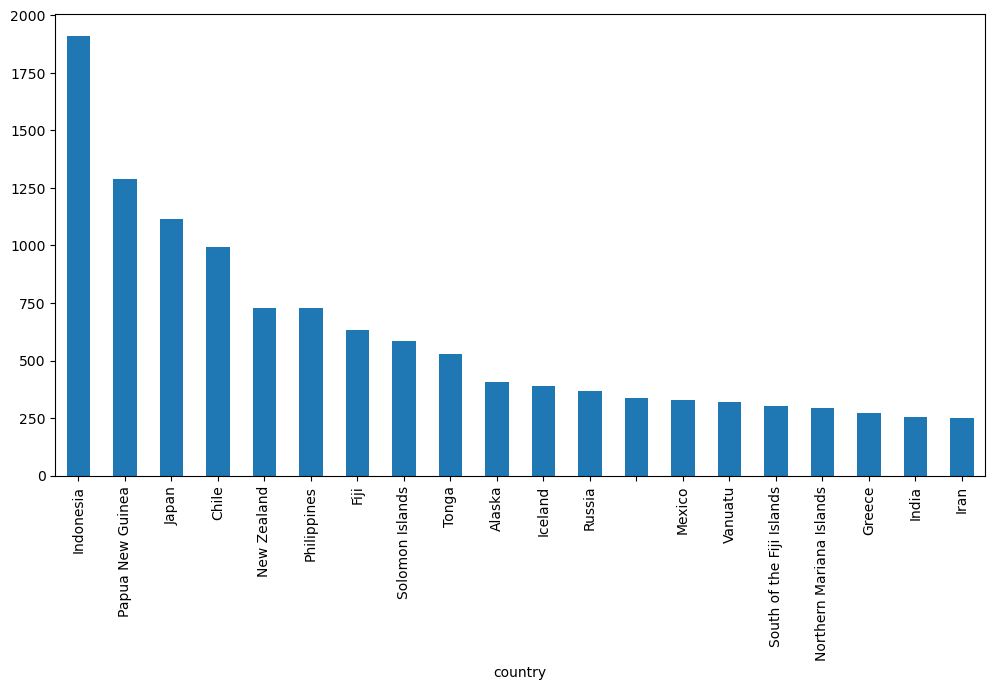

In [65]:
df.groupby('country').mag.count().nlargest(20).plot(kind='bar', figsize=(12,6)) #bar graph of countries by number of earthquakes

The key difference between aggregation and transformation is that aggregation returns a smaller object than the original, indexed by the group keys, while transformation returns an object with the same index (and same size) as the original object. Groupby + transformation is used when applying an operation that requires information about the whole group. Here we normalize earthquakes by magnitude within country grouping

In [66]:
def normalize(x):
    return (x - x.mean())/x.std()

mag_normalized_by_country = gb.mag.transform(normalize)
mag_normalized_by_country

id
usc000mqlp   -0.915774
usc000mqln   -0.675696
usc000mqls   -0.282385
usc000mf1x   -0.684915
usc000mqlm   -0.666807
                ...   
usc000t6yh   -0.281723
usc000t6y2   -0.451617
usc000t6y1   -0.627247
usb000t1gp   -0.629262
usc000t6yn    0.043277
Name: mag, Length: 16371, dtype: float64